In [2]:
%load_ext autoreload
%autoreload 2

In [111]:
import time

import numpy as np
from gym.envs.classic_control import rendering
import tensorflow as tf

from data import env_sequences_generator
from model import EnvModel
from utils import plot_pairwise_frames

tf.enable_eager_execution()

In [116]:
def make_dataset(bs, seq_len):
    return tf.data.Dataset.from_generator(
        generator=lambda: env_sequences_generator(seq_len),
        output_types=((tf.float32,), (tf.float32, tf.float32, tf.bool)),
    ).batch(bs).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

In [117]:
model = EnvModel(memory_size=32, output_shape=(210, 160))
model.net.summary()

33600
Model: "model_10"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
user_input (InputLayer)         [(None, None, 3)]    0                                            
__________________________________________________________________________________________________
input_sequence (Dense)          (None, None, 32)     128         user_input[0][0]                 
__________________________________________________________________________________________________
next_state (LSTM)               (None, None, 32)     8320        input_sequence[0][0]             
__________________________________________________________________________________________________
vision_projection (Dense)       (None, None, 33600)  1108800     next_state[0][0]                 
_____________________________________________________________________________________

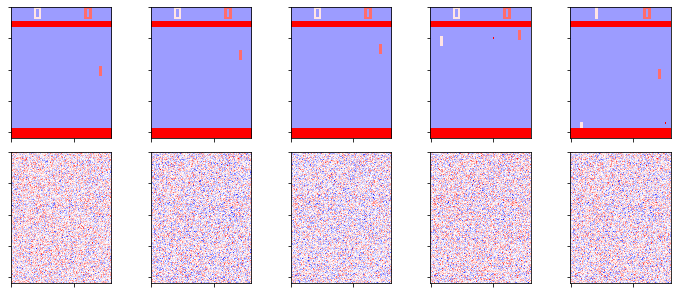

Epoch 1/250
100/100 [==============================] - 433s 4s/step - loss: 0.0924 - vision_reshape_loss: 0.0330 - reward_loss: 8.2212e-04 - done_loss: 0.0586 - vision_reshape_mean_squared_error: 0.0330 - vision_reshape_acc: 0.0263 - reward_mean_squared_error: 8.2212e-04 - reward_acc: 1.0000 - done_mean_squared_error: 0.0586 - done_acc: 0.9565 - val_loss: 0.0113 - val_vision_reshape_loss: 0.0050 - val_reward_loss: 1.7092e-05 - val_done_loss: 0.0064 - val_vision_reshape_mean_squared_error: 0.0050 - val_vision_reshape_acc: 0.0334 - val_reward_mean_squared_error: 1.7092e-05 - val_reward_acc: 1.0000 - val_done_mean_squared_error: 0.0064 - val_done_acc: 1.0000


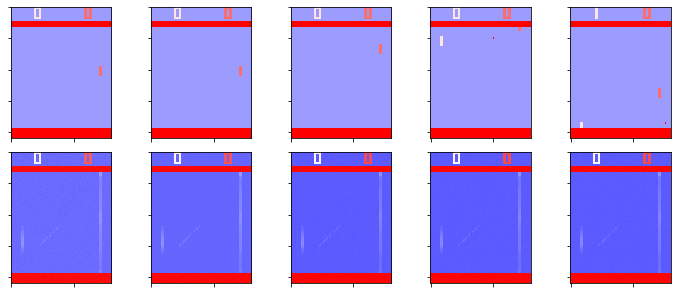

Epoch 2/250
100/100 [==============================] - 424s 4s/step - loss: 0.0080 - vision_reshape_loss: 0.0035 - reward_loss: 1.4680e-05 - done_loss: 0.0045 - vision_reshape_mean_squared_error: 0.0035 - vision_reshape_acc: 0.0302 - reward_mean_squared_error: 1.4680e-05 - reward_acc: 1.0000 - done_mean_squared_error: 0.0045 - done_acc: 1.0000 - val_loss: 0.0057 - val_vision_reshape_loss: 0.0026 - val_reward_loss: 1.4043e-05 - val_done_loss: 0.0030 - val_vision_reshape_mean_squared_error: 0.0026 - val_vision_reshape_acc: 0.0260 - val_reward_mean_squared_error: 1.4043e-05 - val_reward_acc: 1.0000 - val_done_mean_squared_error: 0.0030 - val_done_acc: 1.0000


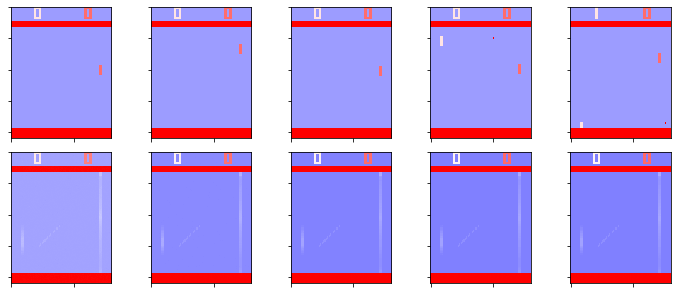

Epoch 3/250
100/100 [==============================] - 414s 4s/step - loss: 0.0044 - vision_reshape_loss: 0.0022 - reward_loss: 9.9217e-06 - done_loss: 0.0022 - vision_reshape_mean_squared_error: 0.0022 - vision_reshape_acc: 0.0260 - reward_mean_squared_error: 9.9217e-06 - reward_acc: 1.0000 - done_mean_squared_error: 0.0022 - done_acc: 1.0000 - val_loss: 0.0033 - val_vision_reshape_loss: 0.0019 - val_reward_loss: 5.5430e-06 - val_done_loss: 0.0015 - val_vision_reshape_mean_squared_error: 0.0019 - val_vision_reshape_acc: 0.0249 - val_reward_mean_squared_error: 5.5430e-06 - val_reward_acc: 1.0000 - val_done_mean_squared_error: 0.0015 - val_done_acc: 1.0000


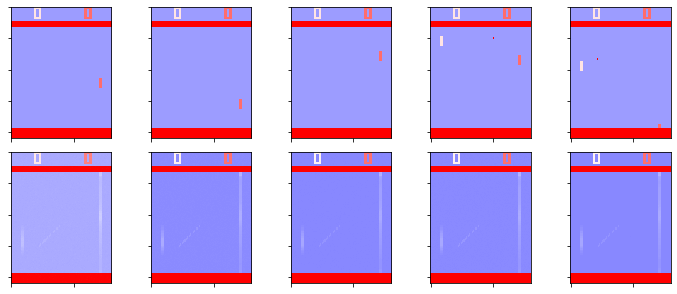

Epoch 4/250
100/100 [==============================] - 413s 4s/step - loss: 0.0027 - vision_reshape_loss: 0.0017 - reward_loss: 8.0989e-06 - done_loss: 0.0011 - vision_reshape_mean_squared_error: 0.0017 - vision_reshape_acc: 0.0264 - reward_mean_squared_error: 8.0989e-06 - reward_acc: 1.0000 - done_mean_squared_error: 0.0011 - done_acc: 1.0000 - val_loss: 0.0022 - val_vision_reshape_loss: 0.0015 - val_reward_loss: 6.1438e-06 - val_done_loss: 7.5568e-04 - val_vision_reshape_mean_squared_error: 0.0015 - val_vision_reshape_acc: 0.0254 - val_reward_mean_squared_error: 6.1438e-06 - val_reward_acc: 1.0000 - val_done_mean_squared_error: 7.5568e-04 - val_done_acc: 1.0000


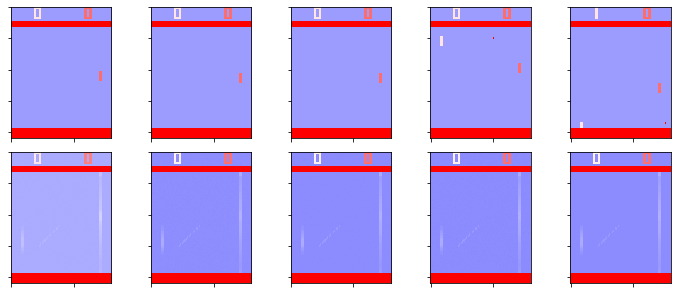

Epoch 5/250
100/100 [==============================] - 412s 4s/step - loss: 0.0019 - vision_reshape_loss: 0.0013 - reward_loss: 4.9379e-06 - done_loss: 5.3469e-04 - vision_reshape_mean_squared_error: 0.0013 - vision_reshape_acc: 0.0262 - reward_mean_squared_error: 4.9379e-06 - reward_acc: 1.0000 - done_mean_squared_error: 5.3469e-04 - done_acc: 1.0000 - val_loss: 0.0016 - val_vision_reshape_loss: 0.0012 - val_reward_loss: 3.7068e-06 - val_done_loss: 3.6423e-04 - val_vision_reshape_mean_squared_error: 0.0012 - val_vision_reshape_acc: 0.0264 - val_reward_mean_squared_error: 3.7068e-06 - val_reward_acc: 1.0000 - val_done_mean_squared_error: 3.6423e-04 - val_done_acc: 1.0000


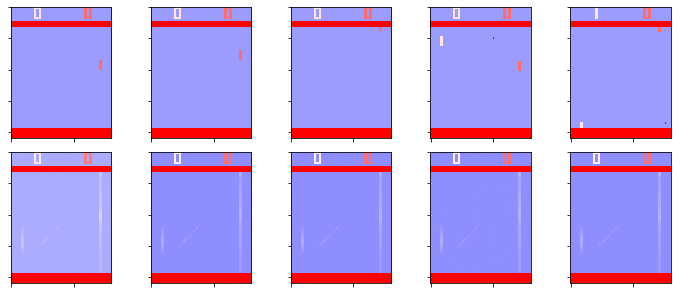

Epoch 6/250
100/100 [==============================] - 412s 4s/step - loss: 0.0014 - vision_reshape_loss: 0.0011 - reward_loss: 5.9867e-06 - done_loss: 2.7903e-04 - vision_reshape_mean_squared_error: 0.0011 - vision_reshape_acc: 0.0277 - reward_mean_squared_error: 5.9867e-06 - reward_acc: 1.0000 - done_mean_squared_error: 2.7903e-04 - done_acc: 1.0000 - val_loss: 0.0013 - val_vision_reshape_loss: 0.0010 - val_reward_loss: 4.0091e-06 - val_done_loss: 2.0389e-04 - val_vision_reshape_mean_squared_error: 0.0010 - val_vision_reshape_acc: 0.0285 - val_reward_mean_squared_error: 4.0091e-06 - val_reward_acc: 1.0000 - val_done_mean_squared_error: 2.0389e-04 - val_done_acc: 1.0000


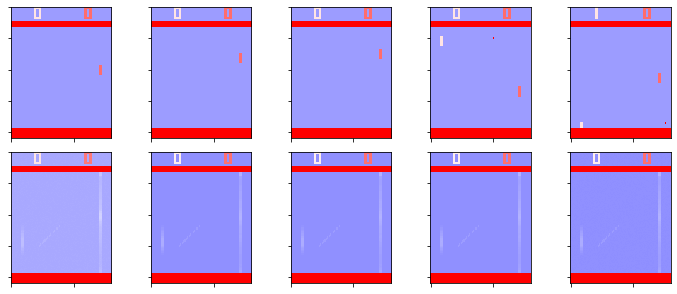

Epoch 7/250
100/100 [==============================] - 412s 4s/step - loss: 0.0011 - vision_reshape_loss: 9.7457e-04 - reward_loss: 4.6922e-06 - done_loss: 1.5478e-04 - vision_reshape_mean_squared_error: 9.7457e-04 - vision_reshape_acc: 0.0287 - reward_mean_squared_error: 4.6922e-06 - reward_acc: 1.0000 - done_mean_squared_error: 1.5478e-04 - done_acc: 1.0000 - val_loss: 0.0010 - val_vision_reshape_loss: 9.1652e-04 - val_reward_loss: 1.6067e-05 - val_done_loss: 1.1383e-04 - val_vision_reshape_mean_squared_error: 9.1652e-04 - val_vision_reshape_acc: 0.0301 - val_reward_mean_squared_error: 1.6067e-05 - val_reward_acc: 1.0000 - val_done_mean_squared_error: 1.1383e-04 - val_done_acc: 1.0000


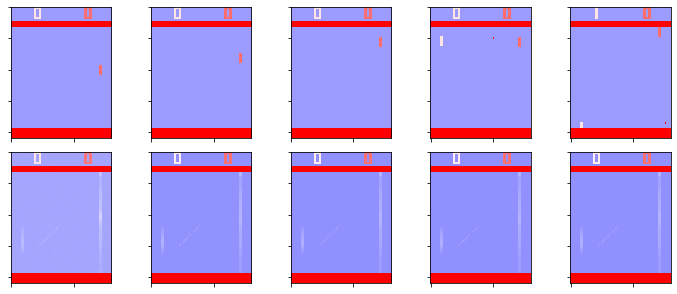

Epoch 8/250
100/100 [==============================] - 413s 4s/step - loss: 9.6136e-04 - vision_reshape_loss: 8.6462e-04 - reward_loss: 4.9416e-06 - done_loss: 9.1800e-05 - vision_reshape_mean_squared_error: 8.6462e-04 - vision_reshape_acc: 0.0281 - reward_mean_squared_error: 4.9416e-06 - reward_acc: 1.0000 - done_mean_squared_error: 9.1800e-05 - done_acc: 1.0000 - val_loss: 8.7047e-04 - val_vision_reshape_loss: 7.9778e-04 - val_reward_loss: 5.8879e-06 - val_done_loss: 6.6797e-05 - val_vision_reshape_mean_squared_error: 7.9778e-04 - val_vision_reshape_acc: 0.0263 - val_reward_mean_squared_error: 5.8879e-06 - val_reward_acc: 1.0000 - val_done_mean_squared_error: 6.6797e-05 - val_done_acc: 1.0000


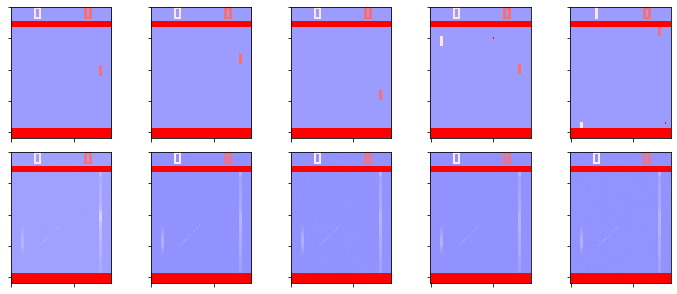

Epoch 9/250
100/100 [==============================] - 412s 4s/step - loss: 8.3364e-04 - vision_reshape_loss: 7.7043e-04 - reward_loss: 4.9687e-06 - done_loss: 5.8246e-05 - vision_reshape_mean_squared_error: 7.7043e-04 - vision_reshape_acc: 0.0285 - reward_mean_squared_error: 4.9687e-06 - reward_acc: 1.0000 - done_mean_squared_error: 5.8246e-05 - done_acc: 1.0000 - val_loss: 7.7232e-04 - val_vision_reshape_loss: 7.2005e-04 - val_reward_loss: 6.0743e-06 - val_done_loss: 4.6197e-05 - val_vision_reshape_mean_squared_error: 7.2005e-04 - val_vision_reshape_acc: 0.0281 - val_reward_mean_squared_error: 6.0743e-06 - val_reward_acc: 1.0000 - val_done_mean_squared_error: 4.6197e-05 - val_done_acc: 1.0000


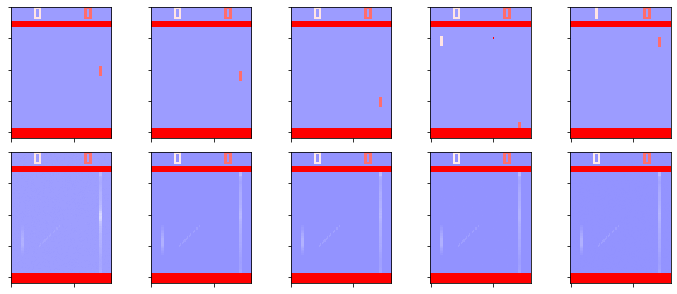

Epoch 10/250
100/100 [==============================] - 412s 4s/step - loss: 7.3638e-04 - vision_reshape_loss: 6.9326e-04 - reward_loss: 3.7840e-06 - done_loss: 3.9333e-05 - vision_reshape_mean_squared_error: 6.9326e-04 - vision_reshape_acc: 0.0297 - reward_mean_squared_error: 3.7840e-06 - reward_acc: 1.0000 - done_mean_squared_error: 3.9333e-05 - done_acc: 1.0000 - val_loss: 6.9538e-04 - val_vision_reshape_loss: 6.5830e-04 - val_reward_loss: 4.1179e-06 - val_done_loss: 3.2970e-05 - val_vision_reshape_mean_squared_error: 6.5830e-04 - val_vision_reshape_acc: 0.0297 - val_reward_mean_squared_error: 4.1179e-06 - val_reward_acc: 1.0000 - val_done_mean_squared_error: 3.2970e-05 - val_done_acc: 1.0000


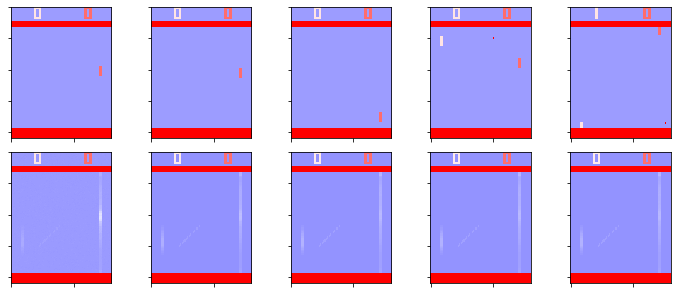

Epoch 11/250
100/100 [==============================] - 413s 4s/step - loss: 6.6220e-04 - vision_reshape_loss: 6.3064e-04 - reward_loss: 3.5028e-06 - done_loss: 2.8060e-05 - vision_reshape_mean_squared_error: 6.3064e-04 - vision_reshape_acc: 0.0297 - reward_mean_squared_error: 3.5028e-06 - reward_acc: 1.0000 - done_mean_squared_error: 2.8060e-05 - done_acc: 1.0000 - val_loss: 6.3029e-04 - val_vision_reshape_loss: 6.0084e-04 - val_reward_loss: 5.8674e-06 - val_done_loss: 2.3585e-05 - val_vision_reshape_mean_squared_error: 6.0084e-04 - val_vision_reshape_acc: 0.0295 - val_reward_mean_squared_error: 5.8674e-06 - val_reward_acc: 1.0000 - val_done_mean_squared_error: 2.3585e-05 - val_done_acc: 1.0000


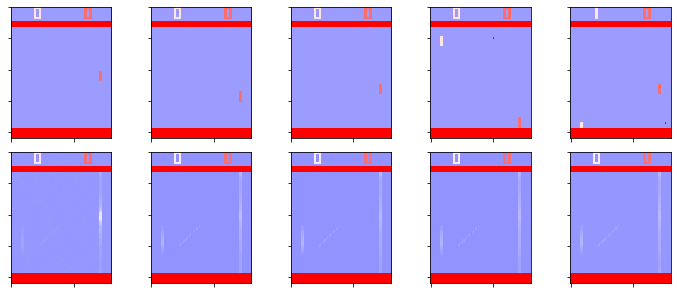

Epoch 12/250
100/100 [==============================] - 412s 4s/step - loss: 6.0895e-04 - vision_reshape_loss: 5.8463e-04 - reward_loss: 3.6139e-06 - done_loss: 2.0703e-05 - vision_reshape_mean_squared_error: 5.8463e-04 - vision_reshape_acc: 0.0298 - reward_mean_squared_error: 3.6139e-06 - reward_acc: 1.0000 - done_mean_squared_error: 2.0703e-05 - done_acc: 1.0000 - val_loss: 5.8611e-04 - val_vision_reshape_loss: 5.6646e-04 - val_reward_loss: 1.2049e-06 - val_done_loss: 1.8440e-05 - val_vision_reshape_mean_squared_error: 5.6646e-04 - val_vision_reshape_acc: 0.0300 - val_reward_mean_squared_error: 1.2049e-06 - val_reward_acc: 1.0000 - val_done_mean_squared_error: 1.8440e-05 - val_done_acc: 1.0000


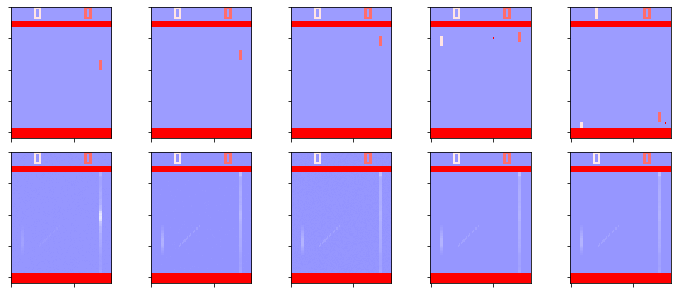

Epoch 13/250
100/100 [==============================] - 413s 4s/step - loss: 5.6243e-04 - vision_reshape_loss: 5.4336e-04 - reward_loss: 3.2004e-06 - done_loss: 1.5876e-05 - vision_reshape_mean_squared_error: 5.4336e-04 - vision_reshape_acc: 0.0300 - reward_mean_squared_error: 3.2004e-06 - reward_acc: 1.0000 - done_mean_squared_error: 1.5876e-05 - done_acc: 1.0000 - val_loss: 5.3145e-04 - val_vision_reshape_loss: 5.1675e-04 - val_reward_loss: 7.1576e-07 - val_done_loss: 1.3985e-05 - val_vision_reshape_mean_squared_error: 5.1675e-04 - val_vision_reshape_acc: 0.0299 - val_reward_mean_squared_error: 7.1576e-07 - val_reward_acc: 1.0000 - val_done_mean_squared_error: 1.3985e-05 - val_done_acc: 1.0000


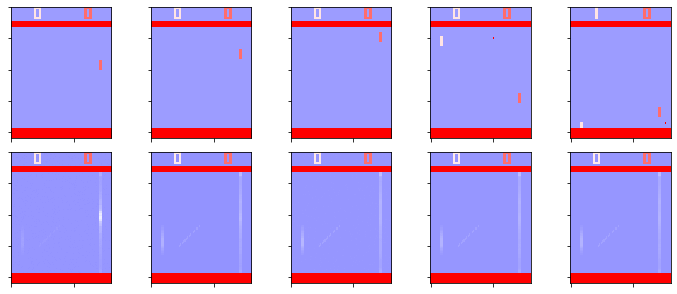

Epoch 14/250
100/100 [==============================] - 412s 4s/step - loss: 5.2525e-04 - vision_reshape_loss: 5.0991e-04 - reward_loss: 2.7993e-06 - done_loss: 1.2539e-05 - vision_reshape_mean_squared_error: 5.0991e-04 - vision_reshape_acc: 0.0301 - reward_mean_squared_error: 2.7993e-06 - reward_acc: 1.0000 - done_mean_squared_error: 1.2539e-05 - done_acc: 1.0000 - val_loss: 4.9539e-04 - val_vision_reshape_loss: 4.8356e-04 - val_reward_loss: 8.1334e-07 - val_done_loss: 1.1015e-05 - val_vision_reshape_mean_squared_error: 4.8356e-04 - val_vision_reshape_acc: 0.0299 - val_reward_mean_squared_error: 8.1334e-07 - val_reward_acc: 1.0000 - val_done_mean_squared_error: 1.1015e-05 - val_done_acc: 1.0000


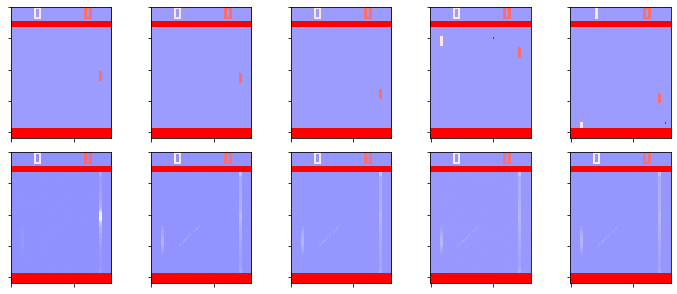

Epoch 15/250
100/100 [==============================] - 412s 4s/step - loss: 4.9471e-04 - vision_reshape_loss: 4.8124e-04 - reward_loss: 3.2623e-06 - done_loss: 1.0208e-05 - vision_reshape_mean_squared_error: 4.8124e-04 - vision_reshape_acc: 0.0295 - reward_mean_squared_error: 3.2623e-06 - reward_acc: 1.0000 - done_mean_squared_error: 1.0208e-05 - done_acc: 1.0000 - val_loss: 4.7294e-04 - val_vision_reshape_loss: 4.6280e-04 - val_reward_loss: 1.0024e-06 - val_done_loss: 9.1300e-06 - val_vision_reshape_mean_squared_error: 4.6280e-04 - val_vision_reshape_acc: 0.0295 - val_reward_mean_squared_error: 1.0024e-06 - val_reward_acc: 1.0000 - val_done_mean_squared_error: 9.1300e-06 - val_done_acc: 1.0000


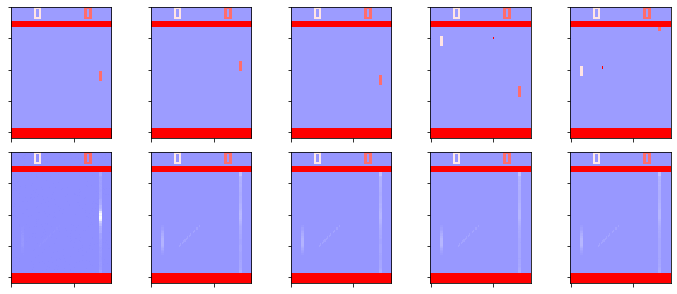

Epoch 16/250
100/100 [==============================] - 411s 4s/step - loss: 4.7036e-04 - vision_reshape_loss: 4.5916e-04 - reward_loss: 2.7324e-06 - done_loss: 8.4669e-06 - vision_reshape_mean_squared_error: 4.5916e-04 - vision_reshape_acc: 0.0287 - reward_mean_squared_error: 2.7324e-06 - reward_acc: 1.0000 - done_mean_squared_error: 8.4669e-06 - done_acc: 1.0000 - val_loss: 4.5811e-04 - val_vision_reshape_loss: 4.4997e-04 - val_reward_loss: 4.2651e-07 - val_done_loss: 7.7137e-06 - val_vision_reshape_mean_squared_error: 4.4997e-04 - val_vision_reshape_acc: 0.0282 - val_reward_mean_squared_error: 4.2651e-07 - val_reward_acc: 1.0000 - val_done_mean_squared_error: 7.7137e-06 - val_done_acc: 1.0000


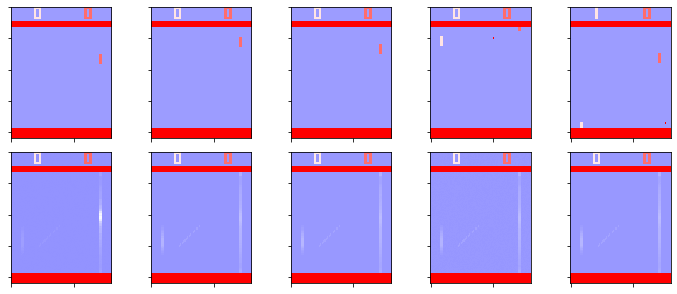

Epoch 17/250
100/100 [==============================] - 412s 4s/step - loss: 4.5042e-04 - vision_reshape_loss: 4.4007e-04 - reward_loss: 3.1557e-06 - done_loss: 7.1943e-06 - vision_reshape_mean_squared_error: 4.4007e-04 - vision_reshape_acc: 0.0288 - reward_mean_squared_error: 3.1557e-06 - reward_acc: 1.0000 - done_mean_squared_error: 7.1943e-06 - done_acc: 1.0000 - val_loss: 4.4303e-04 - val_vision_reshape_loss: 4.3157e-04 - val_reward_loss: 4.7823e-06 - val_done_loss: 6.6801e-06 - val_vision_reshape_mean_squared_error: 4.3157e-04 - val_vision_reshape_acc: 0.0282 - val_reward_mean_squared_error: 4.7823e-06 - val_reward_acc: 1.0000 - val_done_mean_squared_error: 6.6801e-06 - val_done_acc: 1.0000


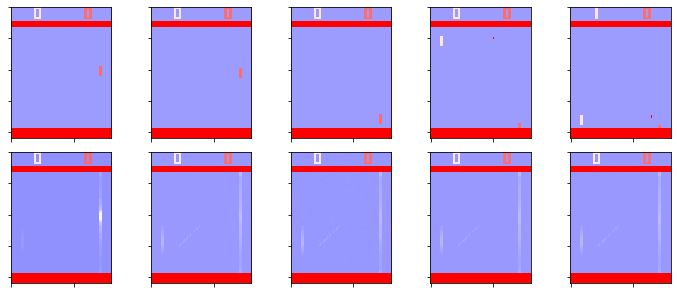

Epoch 18/250
100/100 [==============================] - 412s 4s/step - loss: 4.3654e-04 - vision_reshape_loss: 4.2834e-04 - reward_loss: 1.9609e-06 - done_loss: 6.2417e-06 - vision_reshape_mean_squared_error: 4.2834e-04 - vision_reshape_acc: 0.0287 - reward_mean_squared_error: 1.9609e-06 - reward_acc: 1.0000 - done_mean_squared_error: 6.2417e-06 - done_acc: 1.0000 - val_loss: 4.2125e-04 - val_vision_reshape_loss: 4.1264e-04 - val_reward_loss: 2.6303e-06 - val_done_loss: 5.9726e-06 - val_vision_reshape_mean_squared_error: 4.1264e-04 - val_vision_reshape_acc: 0.0275 - val_reward_mean_squared_error: 2.6303e-06 - val_reward_acc: 1.0000 - val_done_mean_squared_error: 5.9726e-06 - val_done_acc: 1.0000


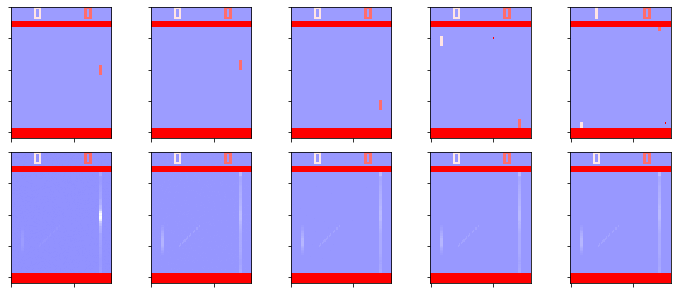

Epoch 19/250
100/100 [==============================] - 412s 4s/step - loss: 4.2639e-04 - vision_reshape_loss: 4.1745e-04 - reward_loss: 3.4047e-06 - done_loss: 5.5307e-06 - vision_reshape_mean_squared_error: 4.1745e-04 - vision_reshape_acc: 0.0281 - reward_mean_squared_error: 3.4047e-06 - reward_acc: 1.0000 - done_mean_squared_error: 5.5307e-06 - done_acc: 1.0000 - val_loss: 4.2760e-04 - val_vision_reshape_loss: 4.2187e-04 - val_reward_loss: 3.8608e-07 - val_done_loss: 5.3382e-06 - val_vision_reshape_mean_squared_error: 4.2187e-04 - val_vision_reshape_acc: 0.0287 - val_reward_mean_squared_error: 3.8608e-07 - val_reward_acc: 1.0000 - val_done_mean_squared_error: 5.3382e-06 - val_done_acc: 1.0000


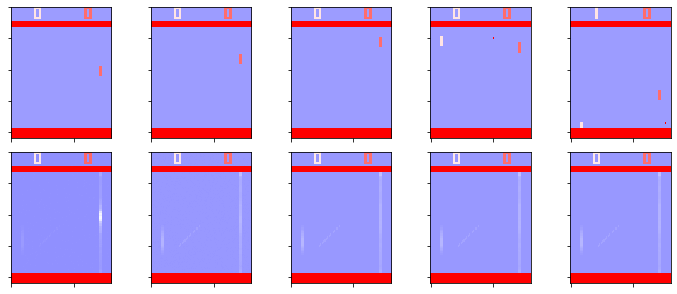

Epoch 20/250
100/100 [==============================] - 410s 4s/step - loss: 4.1708e-04 - vision_reshape_loss: 4.1013e-04 - reward_loss: 1.9828e-06 - done_loss: 4.9708e-06 - vision_reshape_mean_squared_error: 4.1013e-04 - vision_reshape_acc: 0.0276 - reward_mean_squared_error: 1.9828e-06 - reward_acc: 1.0000 - done_mean_squared_error: 4.9708e-06 - done_acc: 1.0000 - val_loss: 4.2116e-04 - val_vision_reshape_loss: 4.0761e-04 - val_reward_loss: 8.9015e-06 - val_done_loss: 4.6516e-06 - val_vision_reshape_mean_squared_error: 4.0761e-04 - val_vision_reshape_acc: 0.0268 - val_reward_mean_squared_error: 8.9015e-06 - val_reward_acc: 1.0000 - val_done_mean_squared_error: 4.6516e-06 - val_done_acc: 1.0000


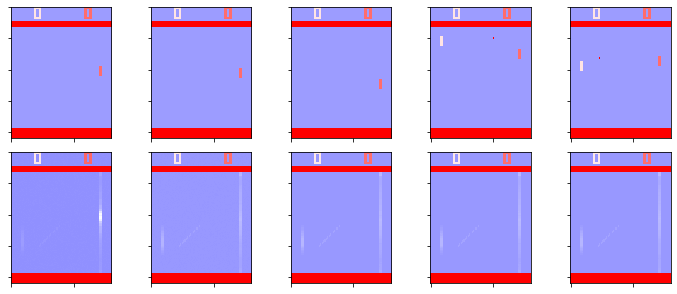

Epoch 21/250
100/100 [==============================] - 411s 4s/step - loss: 4.1148e-04 - vision_reshape_loss: 4.0428e-04 - reward_loss: 2.7135e-06 - done_loss: 4.4879e-06 - vision_reshape_mean_squared_error: 4.0428e-04 - vision_reshape_acc: 0.0268 - reward_mean_squared_error: 2.7135e-06 - reward_acc: 1.0000 - done_mean_squared_error: 4.4879e-06 - done_acc: 1.0000 - val_loss: 4.1132e-04 - val_vision_reshape_loss: 4.0204e-04 - val_reward_loss: 5.0484e-06 - val_done_loss: 4.2316e-06 - val_vision_reshape_mean_squared_error: 4.0204e-04 - val_vision_reshape_acc: 0.0271 - val_reward_mean_squared_error: 5.0484e-06 - val_reward_acc: 1.0000 - val_done_mean_squared_error: 4.2316e-06 - val_done_acc: 1.0000


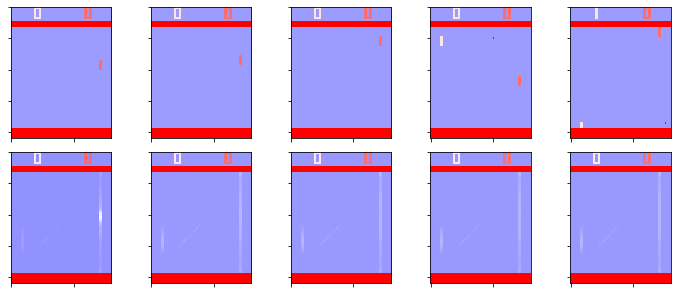

Epoch 22/250
100/100 [==============================] - 413s 4s/step - loss: 4.0611e-04 - vision_reshape_loss: 3.9918e-04 - reward_loss: 2.8293e-06 - done_loss: 4.1003e-06 - vision_reshape_mean_squared_error: 3.9918e-04 - vision_reshape_acc: 0.0262 - reward_mean_squared_error: 2.8293e-06 - reward_acc: 1.0000 - done_mean_squared_error: 4.1003e-06 - done_acc: 1.0000 - val_loss: 4.0733e-04 - val_vision_reshape_loss: 4.0125e-04 - val_reward_loss: 2.1902e-06 - val_done_loss: 3.8854e-06 - val_vision_reshape_mean_squared_error: 4.0125e-04 - val_vision_reshape_acc: 0.0262 - val_reward_mean_squared_error: 2.1902e-06 - val_reward_acc: 1.0000 - val_done_mean_squared_error: 3.8854e-06 - val_done_acc: 1.0000


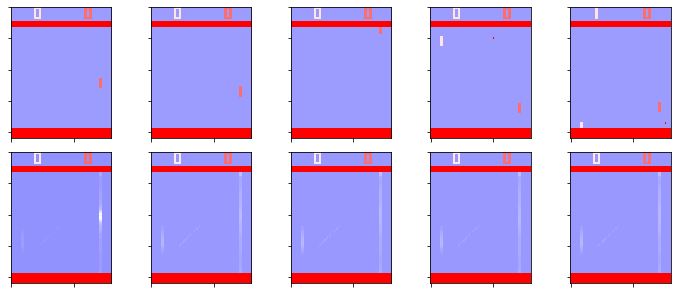

Epoch 23/250
100/100 [==============================] - 413s 4s/step - loss: 4.0207e-04 - vision_reshape_loss: 3.9599e-04 - reward_loss: 2.3193e-06 - done_loss: 3.7631e-06 - vision_reshape_mean_squared_error: 3.9599e-04 - vision_reshape_acc: 0.0259 - reward_mean_squared_error: 2.3193e-06 - reward_acc: 1.0000 - done_mean_squared_error: 3.7631e-06 - done_acc: 1.0000 - val_loss: 3.9929e-04 - val_vision_reshape_loss: 3.9552e-04 - val_reward_loss: 1.5402e-07 - val_done_loss: 3.6192e-06 - val_vision_reshape_mean_squared_error: 3.9552e-04 - val_vision_reshape_acc: 0.0260 - val_reward_mean_squared_error: 1.5402e-07 - val_reward_acc: 1.0000 - val_done_mean_squared_error: 3.6192e-06 - val_done_acc: 1.0000


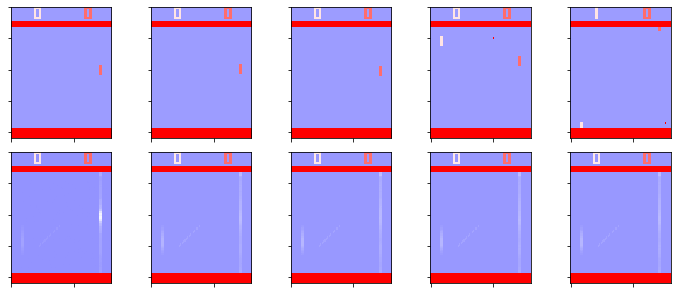

Epoch 24/250
100/100 [==============================] - 414s 4s/step - loss: 3.9650e-04 - vision_reshape_loss: 3.9061e-04 - reward_loss: 2.4033e-06 - done_loss: 3.4856e-06 - vision_reshape_mean_squared_error: 3.9061e-04 - vision_reshape_acc: 0.0256 - reward_mean_squared_error: 2.4033e-06 - reward_acc: 1.0000 - done_mean_squared_error: 3.4856e-06 - done_acc: 1.0000 - val_loss: 3.9332e-04 - val_vision_reshape_loss: 3.8845e-04 - val_reward_loss: 1.4362e-06 - val_done_loss: 3.4284e-06 - val_vision_reshape_mean_squared_error: 3.8845e-04 - val_vision_reshape_acc: 0.0250 - val_reward_mean_squared_error: 1.4362e-06 - val_reward_acc: 1.0000 - val_done_mean_squared_error: 3.4284e-06 - val_done_acc: 1.0000


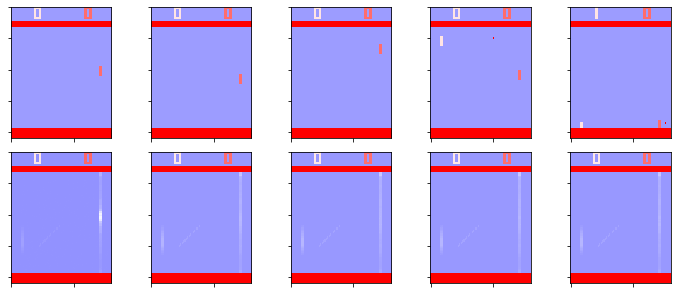

Epoch 25/250
100/100 [==============================] - 412s 4s/step - loss: 3.9820e-04 - vision_reshape_loss: 3.9168e-04 - reward_loss: 3.2743e-06 - done_loss: 3.2399e-06 - vision_reshape_mean_squared_error: 3.9168e-04 - vision_reshape_acc: 0.0252 - reward_mean_squared_error: 3.2743e-06 - reward_acc: 1.0000 - done_mean_squared_error: 3.2399e-06 - done_acc: 1.0000 - val_loss: 3.8933e-04 - val_vision_reshape_loss: 3.8604e-04 - val_reward_loss: 1.5997e-07 - val_done_loss: 3.1233e-06 - val_vision_reshape_mean_squared_error: 3.8604e-04 - val_vision_reshape_acc: 0.0260 - val_reward_mean_squared_error: 1.5997e-07 - val_reward_acc: 1.0000 - val_done_mean_squared_error: 3.1233e-06 - val_done_acc: 1.0000


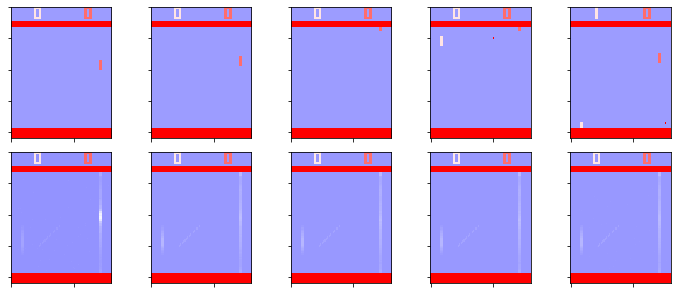

Epoch 26/250
100/100 [==============================] - 413s 4s/step - loss: 3.9528e-04 - vision_reshape_loss: 3.8910e-04 - reward_loss: 3.1647e-06 - done_loss: 3.0145e-06 - vision_reshape_mean_squared_error: 3.8910e-04 - vision_reshape_acc: 0.0251 - reward_mean_squared_error: 3.1647e-06 - reward_acc: 1.0000 - done_mean_squared_error: 3.0145e-06 - done_acc: 1.0000 - val_loss: 3.9255e-04 - val_vision_reshape_loss: 3.8929e-04 - val_reward_loss: 3.6206e-07 - val_done_loss: 2.8985e-06 - val_vision_reshape_mean_squared_error: 3.8929e-04 - val_vision_reshape_acc: 0.0264 - val_reward_mean_squared_error: 3.6206e-07 - val_reward_acc: 1.0000 - val_done_mean_squared_error: 2.8985e-06 - val_done_acc: 1.0000


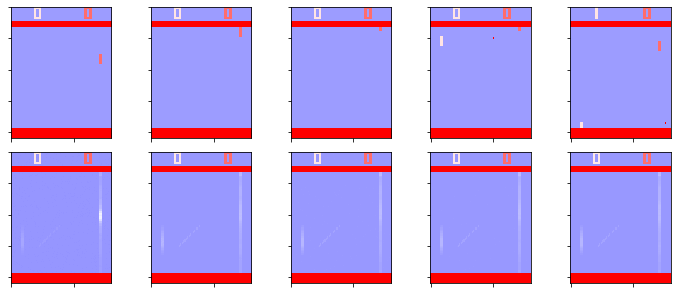

Epoch 27/250
100/100 [==============================] - 412s 4s/step - loss: 3.9063e-04 - vision_reshape_loss: 3.8694e-04 - reward_loss: 8.7156e-07 - done_loss: 2.8269e-06 - vision_reshape_mean_squared_error: 3.8693e-04 - vision_reshape_acc: 0.0247 - reward_mean_squared_error: 8.7156e-07 - reward_acc: 1.0000 - done_mean_squared_error: 2.8269e-06 - done_acc: 1.0000 - val_loss: 3.9061e-04 - val_vision_reshape_loss: 3.8668e-04 - val_reward_loss: 1.1696e-06 - val_done_loss: 2.7553e-06 - val_vision_reshape_mean_squared_error: 3.8668e-04 - val_vision_reshape_acc: 0.0255 - val_reward_mean_squared_error: 1.1696e-06 - val_reward_acc: 1.0000 - val_done_mean_squared_error: 2.7553e-06 - val_done_acc: 1.0000


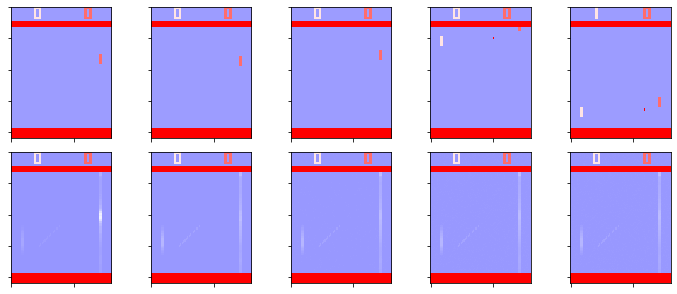

Epoch 28/250
100/100 [==============================] - 412s 4s/step - loss: 3.9008e-04 - vision_reshape_loss: 3.8399e-04 - reward_loss: 3.4335e-06 - done_loss: 2.6509e-06 - vision_reshape_mean_squared_error: 3.8399e-04 - vision_reshape_acc: 0.0246 - reward_mean_squared_error: 3.4335e-06 - reward_acc: 1.0000 - done_mean_squared_error: 2.6509e-06 - done_acc: 1.0000 - val_loss: 3.8806e-04 - val_vision_reshape_loss: 3.8492e-04 - val_reward_loss: 6.2842e-07 - val_done_loss: 2.5140e-06 - val_vision_reshape_mean_squared_error: 3.8492e-04 - val_vision_reshape_acc: 0.0236 - val_reward_mean_squared_error: 6.2842e-07 - val_reward_acc: 1.0000 - val_done_mean_squared_error: 2.5140e-06 - val_done_acc: 1.0000


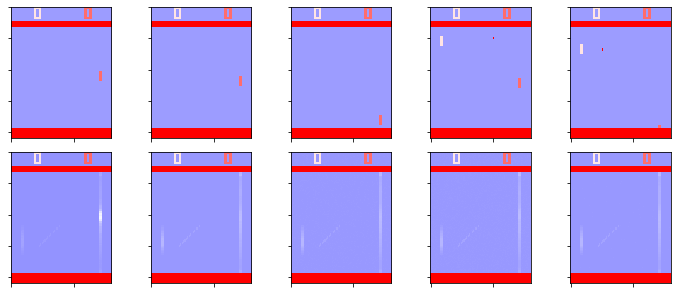

Epoch 29/250
100/100 [==============================] - 411s 4s/step - loss: 3.8791e-04 - vision_reshape_loss: 3.8336e-04 - reward_loss: 2.0559e-06 - done_loss: 2.4924e-06 - vision_reshape_mean_squared_error: 3.8336e-04 - vision_reshape_acc: 0.0241 - reward_mean_squared_error: 2.0559e-06 - reward_acc: 1.0000 - done_mean_squared_error: 2.4924e-06 - done_acc: 1.0000 - val_loss: 3.9350e-04 - val_vision_reshape_loss: 3.9099e-04 - val_reward_loss: 1.0190e-07 - val_done_loss: 2.4026e-06 - val_vision_reshape_mean_squared_error: 3.9099e-04 - val_vision_reshape_acc: 0.0240 - val_reward_mean_squared_error: 1.0190e-07 - val_reward_acc: 1.0000 - val_done_mean_squared_error: 2.4026e-06 - val_done_acc: 1.0000


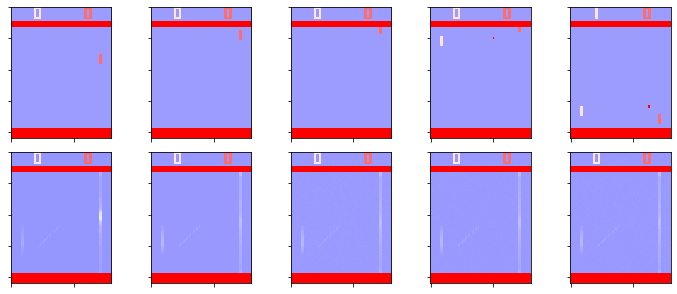

Epoch 30/250
100/100 [==============================] - 411s 4s/step - loss: 3.8842e-04 - vision_reshape_loss: 3.8318e-04 - reward_loss: 2.8954e-06 - done_loss: 2.3527e-06 - vision_reshape_mean_squared_error: 3.8318e-04 - vision_reshape_acc: 0.0240 - reward_mean_squared_error: 2.8954e-06 - reward_acc: 1.0000 - done_mean_squared_error: 2.3527e-06 - done_acc: 1.0000 - val_loss: 3.8549e-04 - val_vision_reshape_loss: 3.8280e-04 - val_reward_loss: 4.6837e-07 - val_done_loss: 2.2203e-06 - val_vision_reshape_mean_squared_error: 3.8280e-04 - val_vision_reshape_acc: 0.0240 - val_reward_mean_squared_error: 4.6837e-07 - val_reward_acc: 1.0000 - val_done_mean_squared_error: 2.2203e-06 - val_done_acc: 1.0000


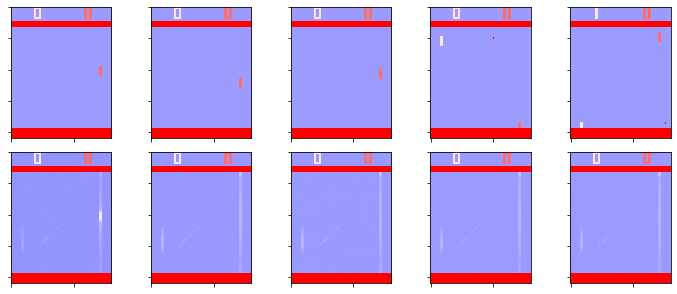

Epoch 31/250
100/100 [==============================] - 411s 4s/step - loss: 3.8893e-04 - vision_reshape_loss: 3.8424e-04 - reward_loss: 2.4716e-06 - done_loss: 2.2271e-06 - vision_reshape_mean_squared_error: 3.8424e-04 - vision_reshape_acc: 0.0237 - reward_mean_squared_error: 2.4716e-06 - reward_acc: 1.0000 - done_mean_squared_error: 2.2271e-06 - done_acc: 1.0000 - val_loss: 3.8705e-04 - val_vision_reshape_loss: 3.8310e-04 - val_reward_loss: 1.7754e-06 - val_done_loss: 2.1782e-06 - val_vision_reshape_mean_squared_error: 3.8310e-04 - val_vision_reshape_acc: 0.0233 - val_reward_mean_squared_error: 1.7754e-06 - val_reward_acc: 1.0000 - val_done_mean_squared_error: 2.1782e-06 - val_done_acc: 1.0000


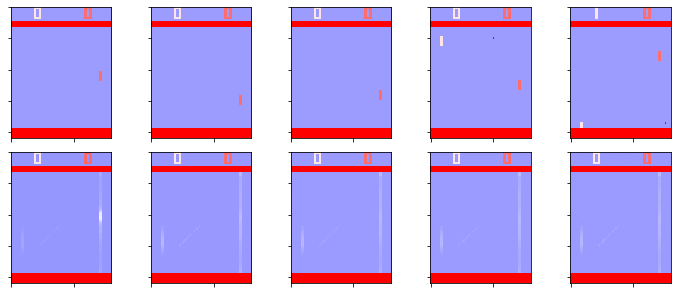

Epoch 32/250
100/100 [==============================] - 412s 4s/step - loss: 3.8769e-04 - vision_reshape_loss: 3.8210e-04 - reward_loss: 3.4776e-06 - done_loss: 2.1120e-06 - vision_reshape_mean_squared_error: 3.8210e-04 - vision_reshape_acc: 0.0242 - reward_mean_squared_error: 3.4776e-06 - reward_acc: 1.0000 - done_mean_squared_error: 2.1120e-06 - done_acc: 1.0000 - val_loss: 3.7201e-04 - val_vision_reshape_loss: 3.6789e-04 - val_reward_loss: 2.0746e-06 - val_done_loss: 2.0402e-06 - val_vision_reshape_mean_squared_error: 3.6789e-04 - val_vision_reshape_acc: 0.0241 - val_reward_mean_squared_error: 2.0746e-06 - val_reward_acc: 1.0000 - val_done_mean_squared_error: 2.0402e-06 - val_done_acc: 1.0000


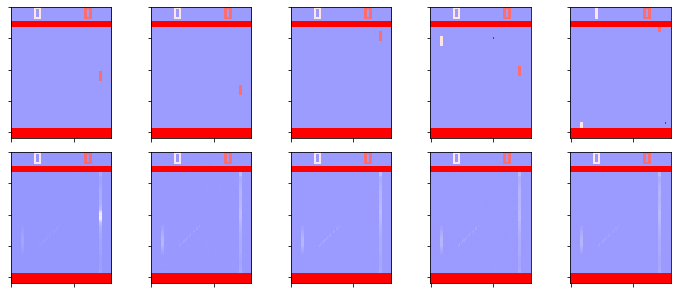

Epoch 33/250
100/100 [==============================] - 411s 4s/step - loss: 3.8487e-04 - vision_reshape_loss: 3.8122e-04 - reward_loss: 1.6494e-06 - done_loss: 2.0028e-06 - vision_reshape_mean_squared_error: 3.8122e-04 - vision_reshape_acc: 0.0238 - reward_mean_squared_error: 1.6494e-06 - reward_acc: 1.0000 - done_mean_squared_error: 2.0028e-06 - done_acc: 1.0000 - val_loss: 3.8959e-04 - val_vision_reshape_loss: 3.8698e-04 - val_reward_loss: 6.5411e-07 - val_done_loss: 1.9604e-06 - val_vision_reshape_mean_squared_error: 3.8698e-04 - val_vision_reshape_acc: 0.0237 - val_reward_mean_squared_error: 6.5411e-07 - val_reward_acc: 1.0000 - val_done_mean_squared_error: 1.9604e-06 - val_done_acc: 1.0000


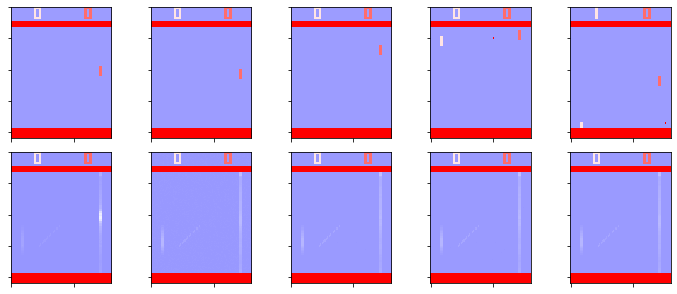

Epoch 34/250
100/100 [==============================] - 423s 4s/step - loss: 3.8399e-04 - vision_reshape_loss: 3.7826e-04 - reward_loss: 3.8253e-06 - done_loss: 1.9057e-06 - vision_reshape_mean_squared_error: 3.7826e-04 - vision_reshape_acc: 0.0236 - reward_mean_squared_error: 3.8253e-06 - reward_acc: 1.0000 - done_mean_squared_error: 1.9057e-06 - done_acc: 1.0000 - val_loss: 3.8610e-04 - val_vision_reshape_loss: 3.8372e-04 - val_reward_loss: 5.0307e-07 - val_done_loss: 1.8737e-06 - val_vision_reshape_mean_squared_error: 3.8372e-04 - val_vision_reshape_acc: 0.0225 - val_reward_mean_squared_error: 5.0307e-07 - val_reward_acc: 1.0000 - val_done_mean_squared_error: 1.8737e-06 - val_done_acc: 1.0000


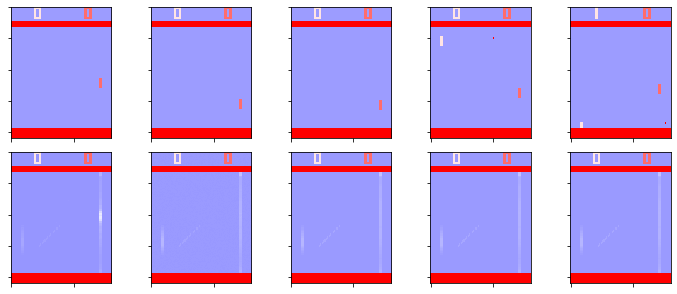

Epoch 35/250
100/100 [==============================] - 412s 4s/step - loss: 3.8335e-04 - vision_reshape_loss: 3.7843e-04 - reward_loss: 3.1003e-06 - done_loss: 1.8165e-06 - vision_reshape_mean_squared_error: 3.7843e-04 - vision_reshape_acc: 0.0235 - reward_mean_squared_error: 3.1003e-06 - reward_acc: 1.0000 - done_mean_squared_error: 1.8165e-06 - done_acc: 1.0000 - val_loss: 3.8754e-04 - val_vision_reshape_loss: 3.8275e-04 - val_reward_loss: 3.0323e-06 - val_done_loss: 1.7604e-06 - val_vision_reshape_mean_squared_error: 3.8275e-04 - val_vision_reshape_acc: 0.0237 - val_reward_mean_squared_error: 3.0323e-06 - val_reward_acc: 1.0000 - val_done_mean_squared_error: 1.7604e-06 - val_done_acc: 1.0000


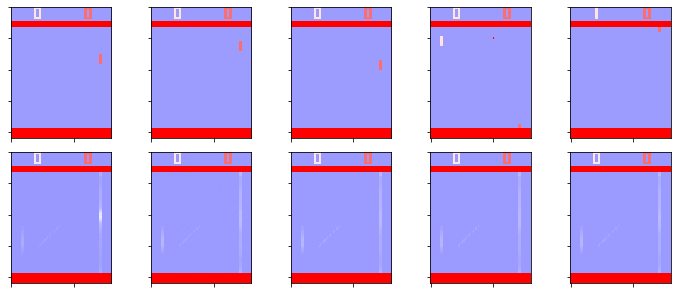

Epoch 36/250
100/100 [==============================] - 411s 4s/step - loss: 3.8044e-04 - vision_reshape_loss: 3.7826e-04 - reward_loss: 4.4534e-07 - done_loss: 1.7361e-06 - vision_reshape_mean_squared_error: 3.7826e-04 - vision_reshape_acc: 0.0237 - reward_mean_squared_error: 4.4534e-07 - reward_acc: 1.0000 - done_mean_squared_error: 1.7361e-06 - done_acc: 1.0000 - val_loss: 3.9572e-04 - val_vision_reshape_loss: 3.9256e-04 - val_reward_loss: 1.4633e-06 - val_done_loss: 1.7052e-06 - val_vision_reshape_mean_squared_error: 3.9256e-04 - val_vision_reshape_acc: 0.0226 - val_reward_mean_squared_error: 1.4633e-06 - val_reward_acc: 1.0000 - val_done_mean_squared_error: 1.7052e-06 - val_done_acc: 1.0000


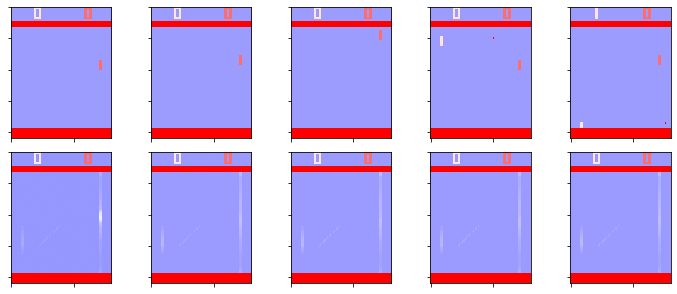

Epoch 37/250
100/100 [==============================] - 411s 4s/step - loss: 3.8448e-04 - vision_reshape_loss: 3.7898e-04 - reward_loss: 3.8418e-06 - done_loss: 1.6585e-06 - vision_reshape_mean_squared_error: 3.7898e-04 - vision_reshape_acc: 0.0235 - reward_mean_squared_error: 3.8418e-06 - reward_acc: 1.0000 - done_mean_squared_error: 1.6585e-06 - done_acc: 1.0000 - val_loss: 3.8645e-04 - val_vision_reshape_loss: 3.8465e-04 - val_reward_loss: 1.7153e-07 - val_done_loss: 1.6282e-06 - val_vision_reshape_mean_squared_error: 3.8465e-04 - val_vision_reshape_acc: 0.0233 - val_reward_mean_squared_error: 1.7153e-07 - val_reward_acc: 1.0000 - val_done_mean_squared_error: 1.6282e-06 - val_done_acc: 1.0000


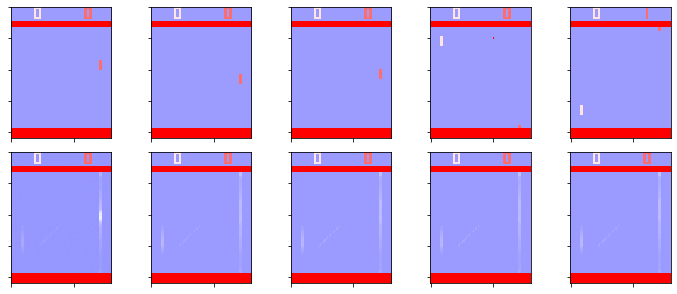

Epoch 38/250
100/100 [==============================] - 412s 4s/step - loss: 3.8202e-04 - vision_reshape_loss: 3.7756e-04 - reward_loss: 2.8711e-06 - done_loss: 1.5845e-06 - vision_reshape_mean_squared_error: 3.7756e-04 - vision_reshape_acc: 0.0234 - reward_mean_squared_error: 2.8711e-06 - reward_acc: 1.0000 - done_mean_squared_error: 1.5845e-06 - done_acc: 1.0000 - val_loss: 3.8224e-04 - val_vision_reshape_loss: 3.8051e-04 - val_reward_loss: 1.7088e-07 - val_done_loss: 1.5516e-06 - val_vision_reshape_mean_squared_error: 3.8051e-04 - val_vision_reshape_acc: 0.0241 - val_reward_mean_squared_error: 1.7088e-07 - val_reward_acc: 1.0000 - val_done_mean_squared_error: 1.5516e-06 - val_done_acc: 1.0000


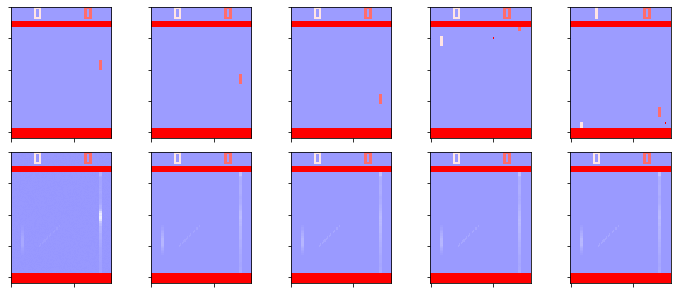

Epoch 39/250
100/100 [==============================] - 412s 4s/step - loss: 3.8177e-04 - vision_reshape_loss: 3.7823e-04 - reward_loss: 2.0246e-06 - done_loss: 1.5158e-06 - vision_reshape_mean_squared_error: 3.7823e-04 - vision_reshape_acc: 0.0232 - reward_mean_squared_error: 2.0246e-06 - reward_acc: 1.0000 - done_mean_squared_error: 1.5158e-06 - done_acc: 1.0000 - val_loss: 3.7475e-04 - val_vision_reshape_loss: 3.7319e-04 - val_reward_loss: 8.1539e-08 - val_done_loss: 1.4723e-06 - val_vision_reshape_mean_squared_error: 3.7319e-04 - val_vision_reshape_acc: 0.0239 - val_reward_mean_squared_error: 8.1539e-08 - val_reward_acc: 1.0000 - val_done_mean_squared_error: 1.4723e-06 - val_done_acc: 1.0000


In [ ]:
dataset = make_dataset(bs=16, seq_len=32)


class PlotCallback(tf.keras.callbacks.Callback):
    def on_epoch_begin(self, batch, logs=None):
        plot_pairwise_frames(
            dataset=make_dataset(1, 128),
            predictor=lambda x: model.net.predict(x),
            which_frames=[1, 4, 16, 64, 127]
        )
        plt.show()


model.net.fit_generator(
    generator=dataset,
    validation_data=dataset,
    validation_steps=2,
    steps_per_epoch=100,
    epochs=250,
    callbacks=[PlotCallback()]
)